<a href="https://colab.research.google.com/github/Hstiles13/Hstiles13/blob/main/Copy_of_Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sqlalchemy import create_engine, text
from scipy.stats.stats import ttest_ind
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

<ipython-input-1-aab57264f91a>:6: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import ttest_ind


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Datasets/games.finalcap.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1512 non-null   object 
 3   Rating             1512 non-null   float64
 4   Times Listed       1512 non-null   int64  
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Summary            1512 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   int64  
 10  Playing            1512 non-null   int64  
 11  Backlogs           1512 non-null   int64  
 12  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 153.7+ KB


No missing value and no incorrect datatypes, so no need for .fillna()/.dropna()/as_type()

In [ ]:
df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,25-Feb-22,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4.8K
1,Hades,10-Dec-19,['Supergiant Games'],4.3,2900,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3.6K
2,The Legend of Zelda: Breath of the Wild,3-Mar-17,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2.6K
3,Undertale,15-Sep-15,"['tobyfox', '8-4']",4.2,3500,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1.8K
4,Hollow Knight,24-Feb-17,['Team Cherry'],4.4,3000,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2.3K


In [ ]:
df.describe()

,Rating,Times Listed,Plays,Playing,Backlogs
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,3.714286,769.459656,6253.579365,267.379630,1452.577381
std,0.541972,687.840871,5894.976420,426.453368,1341.971968
min,0.700000,0.000000,1.000000,0.000000,1.000000
25%,3.400000,284.000000,1800.000000,43.000000,461.750000
50%,3.800000,551.000000,4200.000000,112.500000,1000.000000
75%,4.100000,1000.000000,9100.000000,298.000000,2100.000000
max,4.800000,4300.000000,33000.000000,3800.000000,8300.000000


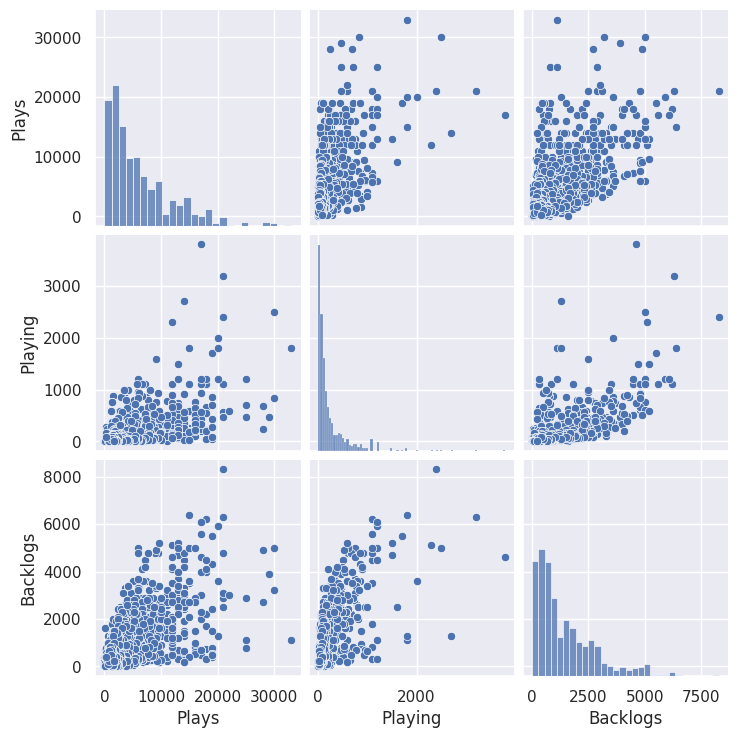

In [ ]:
sns.pairplot(df, vars=['Plays', 'Playing', 'Backlogs'])

<Axes: xlabel='Playing', ylabel='Backlogs'>

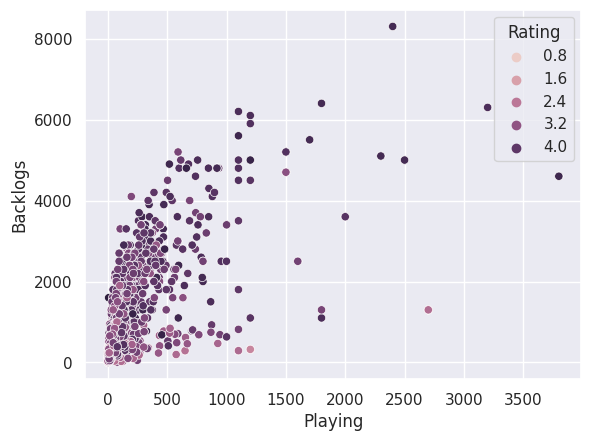

In [ ]:
sns.scatterplot(x=df['Playing'], y=df['Backlogs'], hue="Rating", data=df)

<Axes: xlabel='Plays', ylabel='Count'>

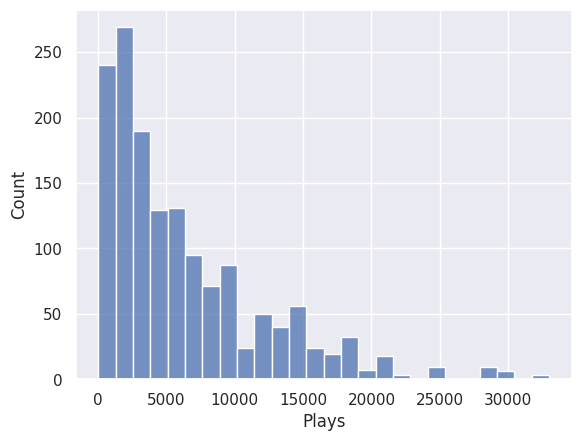

In [ ]:
sns.histplot(df['Plays'])

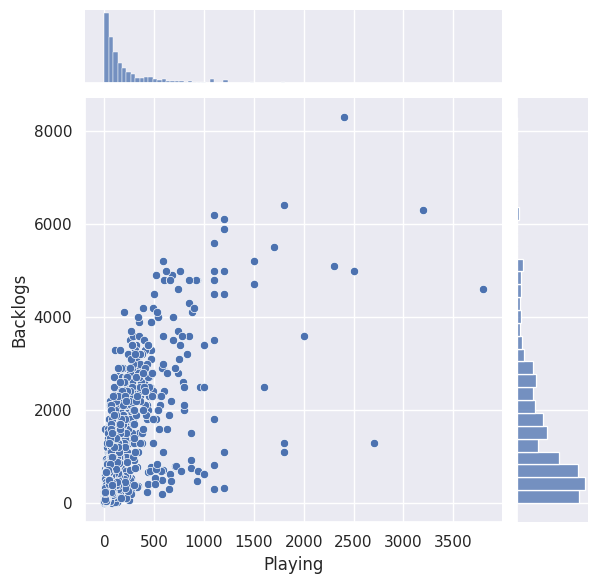

In [ ]:
sns.jointplot(x=df['Playing'],y=df['Backlogs'])

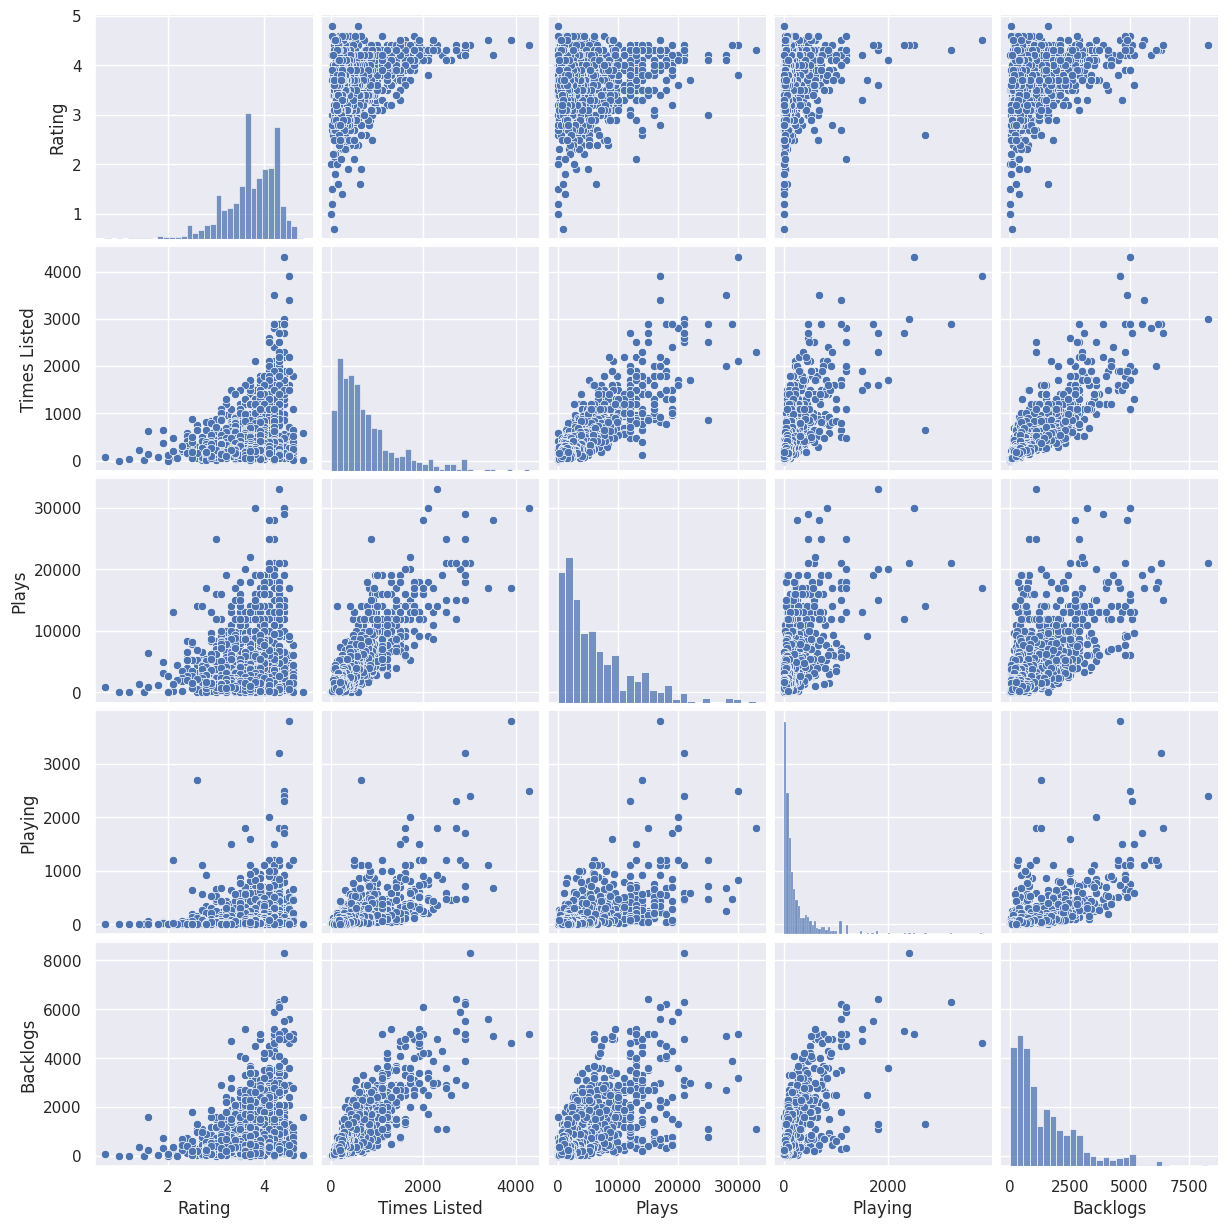

In [ ]:
sns.pairplot(df)

Hypothesis #1
Hypothesis: The amount a game is currently being played doesn't significantly impact the amount of games backlogged.

<Axes: xlabel='Plays', ylabel='Count'>

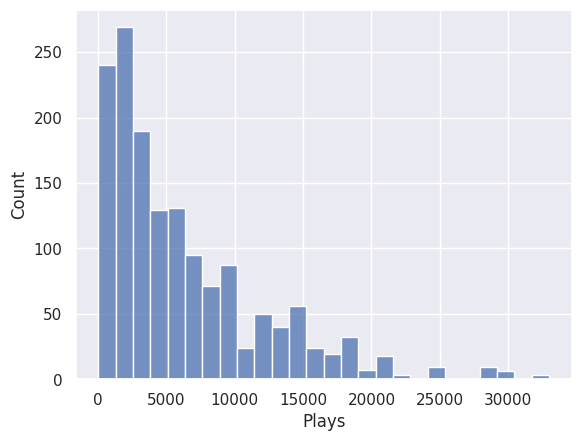

In [ ]:
sns.histplot(df['Plays'])

<Axes: xlabel='Backlogs', ylabel='Count'>

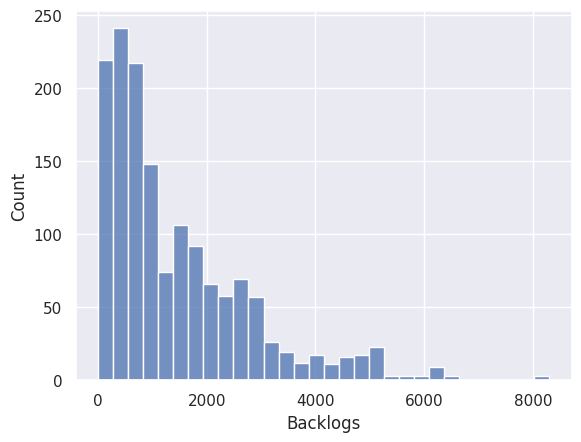

In [ ]:
sns.histplot(df['Backlogs'])

The distribution of these variables are approximately normal

In [ ]:
df.groupby("Plays").mean()[["Playing", "Backlogs"]]

,Playing,Backlogs
Plays,,
1,0.200000,47.2
2,1.000000,145.0
3,0.000000,141.5
5,0.000000,260.0
8,1.000000,57.0
...,...,...
25000,793.333333,1592.0
28000,461.500000,3800.0
29000,471.000000,3900.0


Run an independent-samples t-test on the DataFrames to see if there is a significant difference between games currently being played vs games that are backlogged.

In [ ]:
stats.ttest_ind(df['Plays'], df['Backlogs'])

Ttest_indResult(statistic=30.878370398764986, pvalue=3.308701632881629e-182)

Summary of findings for hypothesis #1:
The t-test shows that there is a significant difference between the amount of Plays between current games and Backlogged games. This means that games that are currrently being played are more popular than games that are backlogged. Hypothesis rejected.

Hypothesis #2
Hypothesis: The amount a game has been played doesn't significantly impact the Rating.

In [ ]:
df_good = df.loc[df['Rating'] >= 3.5]
df_bad = df.loc[df['Rating']< 3.5]

df_good.head()


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,25-Feb-22,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4.8K
1,Hades,10-Dec-19,['Supergiant Games'],4.3,2900,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3.6K
2,The Legend of Zelda: Breath of the Wild,3-Mar-17,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2.6K
3,Undertale,15-Sep-15,"['tobyfox', '8-4']",4.2,3500,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1.8K
4,Hollow Knight,24-Feb-17,['Team Cherry'],4.4,3000,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2.3K


<Axes: xlabel='Rating', ylabel='Count'>

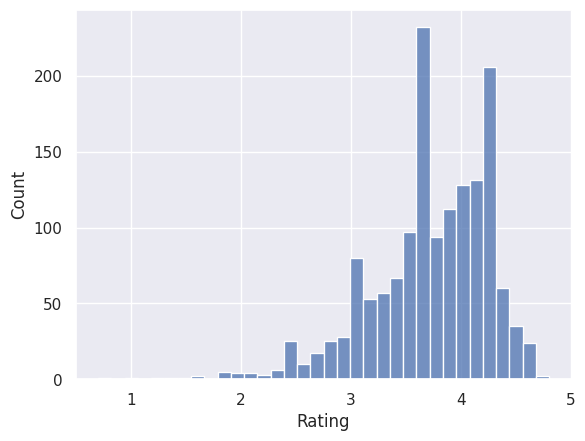

In [ ]:
sns.histplot(df['Rating'])

<Axes: xlabel='Rating', ylabel='Count'>

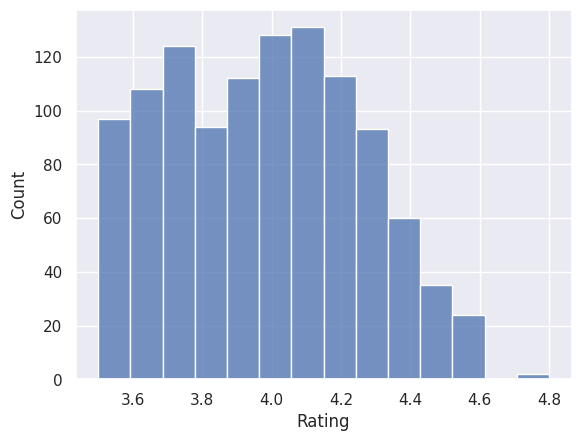

In [ ]:
sns.histplot(df_good['Rating'])

<Axes: xlabel='Rating', ylabel='Count'>

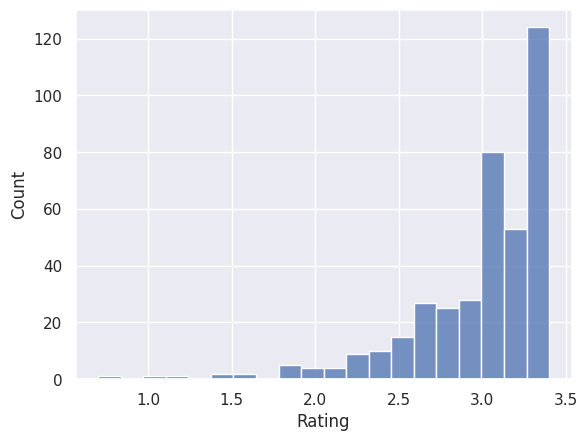

In [ ]:
sns.histplot(df_bad['Rating'])

The distribution of these variables are approximately normal



In [ ]:
df.groupby("Rating").mean()[['Plays']]

,Plays
Rating,
0.7,859.000000
1.0,1.000000
1.2,130.000000
1.4,1300.000000
1.5,55.000000
1.6,3653.500000
1.8,1200.000000
1.9,4050.000000
2.0,676.000000


Run an independent-samples t-test on the DataFrames to see if there is a significant difference between games with a rating 3.5 and above vs games with a rating under 3.5

In [ ]:
stats.ttest_ind(df_good['Rating'], df_bad['Rating'])

Ttest_indResult(statistic=49.658482610634586, pvalue=9.2133e-320)

Summary of findings for hypothesis #2: The t-test shows that there is a significant difference between the amount of Plays between games with a rating of 3.5 and above and games with a rating below 3.5. This means that games with a rating of 3.5 and above are played more than games with a rating below 3.5. Hypothesis rejected.

Recommendations: Invest in game franchises that have a history of ratings over 3.5 and even though they may cost more than games with a rating lower than 3.5, the ROI will far outweigh the cost. When purchasing game franchises, a high number of backlogs is a good indicator that the game still has a high number of users currently playing so invest in franchises with a high number of total plays regardless of the number of backlogs.